# Load archive and plot P1D as a function of parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os
from lace.archive import gadget_archive

### Load Gadget archive

In [2]:
archive = gadget_archive.GadgetArchive(postproc='Cabayol23')

In [3]:
gadget_emu_params=['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']
training_data=archive.get_training_data(emu_params=gadget_emu_params)

### Plot linear power parameters for all entries in archive

For a given simulation, the slope ($n_p$) is constant accross redshifts, but the amplitude ($\Delta_p^2$) increases with time.

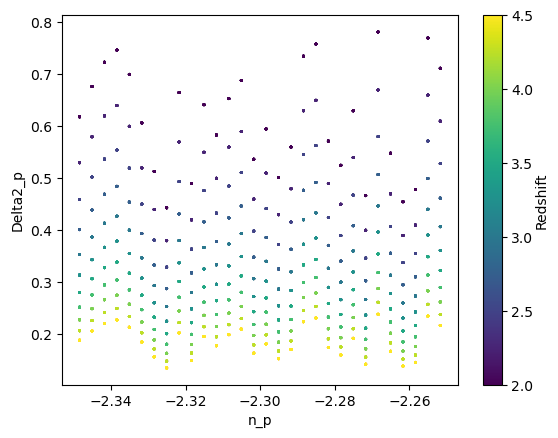

In [4]:
archive.plot_samples('n_p','Delta2_p')

Because all simulations in the emulator have the same background cosmology, the logarithmic growth rate ($f_p$) is only a function of redshift.

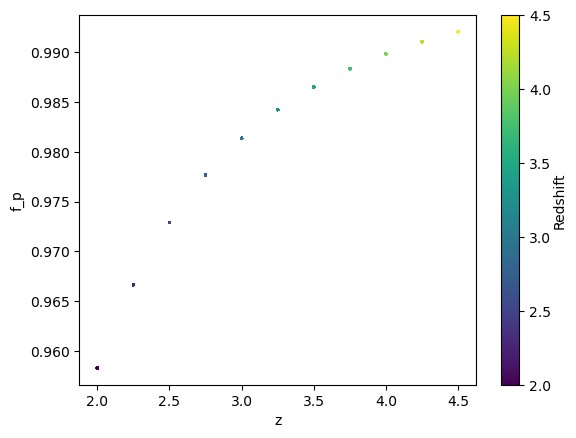

In [5]:
archive.plot_samples('z','f_p')

### Plot IGM parameters for all entries in archive

Mean flux as a function of redshift

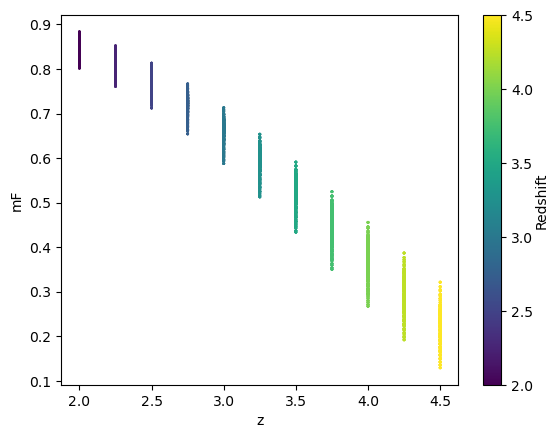

In [6]:
archive.plot_samples('z','mF')

Temperature - density relation described as a power law ($T_0$, $\gamma$)

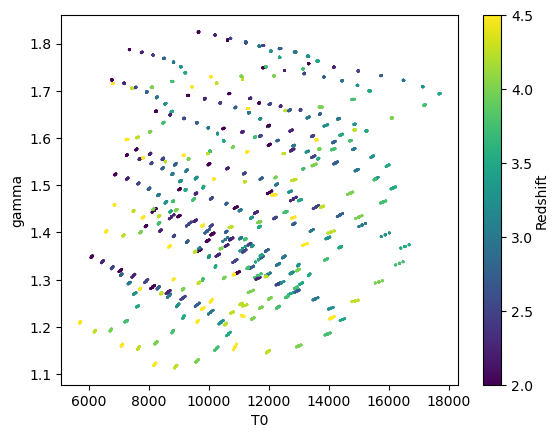

In [7]:
archive.plot_samples('T0','gamma')

Internally, the emulator uses the thermal broadening length ($\sigma_T$, in units of Mpc). Because of the conversion from km/s to Mpc, the relation between $T_0$ and $\sigma_T$ depends on redshift.

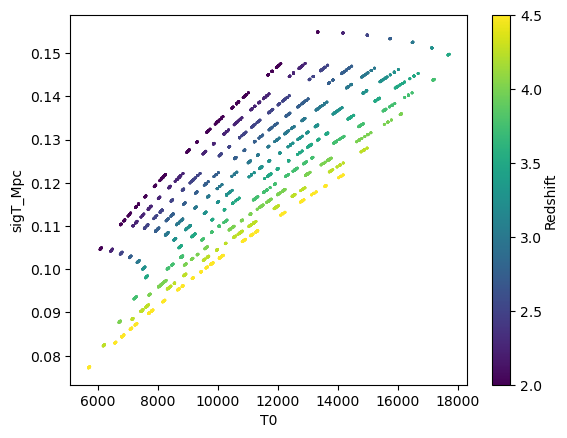

In [8]:
archive.plot_samples('T0','sigT_Mpc')

Gas pressure is parameterised as the filteringh length ($k_F$, in inverse Mpc), and it is also correlated with temperature

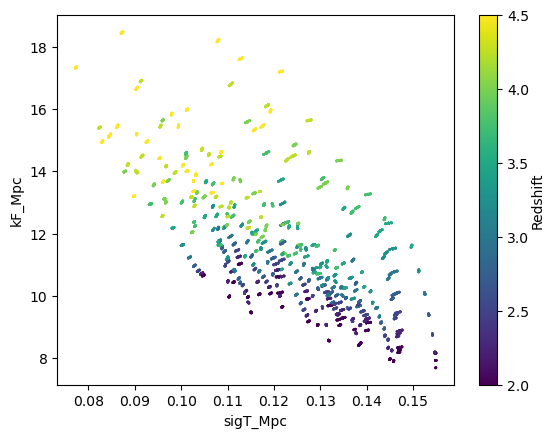

In [9]:
archive.plot_samples('sigT_Mpc','kF_Mpc')

### All projections together

In [10]:
take_pars = ['Delta2_p', 'n_p', 'mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']
nelem = len(training_data)
pars_all = np.zeros((nelem, len(take_pars)))
for ii in range(nelem):
    for jj in range(len(take_pars)):
        pars_all[ii, jj] = training_data[ii][take_pars[jj]]

In [11]:
data = pars_all

In [12]:
take_pars2 = [r'$\Delta^2_p$', r'$n_p$', r'$\bar{F}$', r'$\sigma_T$', r'$\gamma$', r'$k_F$']

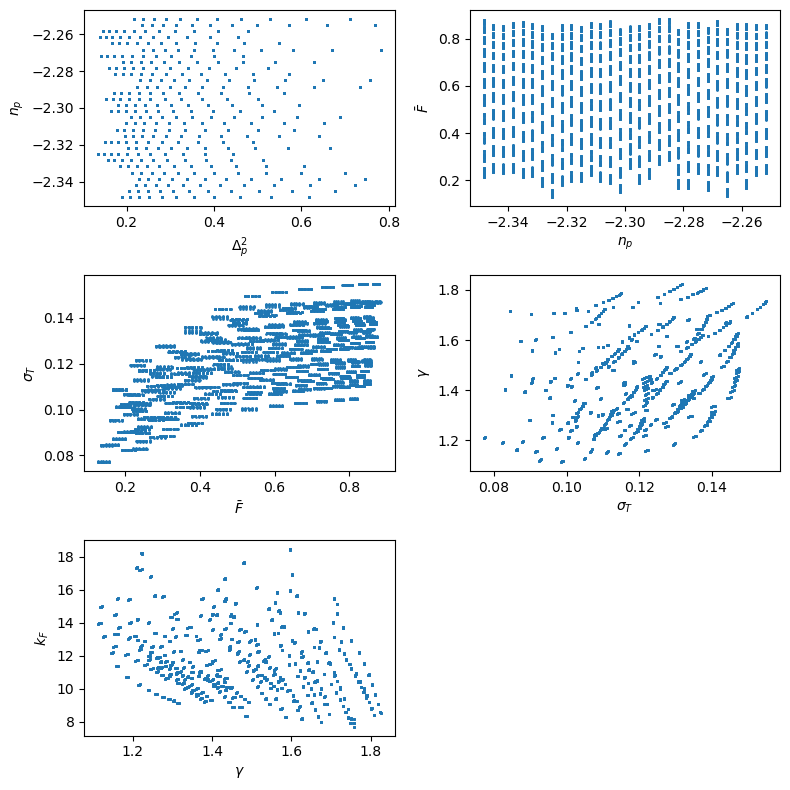

In [13]:
# Get the number of dimensions (columns in the data)
num_dimensions = data.shape[1]

# Determine the layout for subplots
num_rows = 3  # You can adjust the number of rows and columns based on your preference
num_cols = (num_dimensions + 1) // num_rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 8))
# fig.suptitle('Scatter Plots of Data Projections Along the Second Axis', fontsize=16)

# Flatten axs if it's a 2D array
if num_rows > 1:
    axs = axs.flatten()

# Create scatter plots for all pairs of dimensions
for i in range(num_dimensions-1):
    axs[i].scatter(data[:, i], data[:, i+1],  s=1)
#     axs[i].set_title(f'Dimension {i} vs Dimension {j}')
    axs[i].set_xlabel(take_pars2[i])
    axs[i].set_ylabel(take_pars2[i+1])
axs[-1].axis('off')
# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('project_lace.png', dpi=800)

### IGM histories

In [14]:
folder = os.environ["LACE_REPO"] + "/src/lace/data/sim_suites/Australia20/"
igm_lace = np.load(folder + "IGM_histories.npy", allow_pickle=True).item()
igm_nyx = np.load(os.environ["NYX_PATH"] + "/IGM_histories.npy", allow_pickle=True).item()

Plot lace

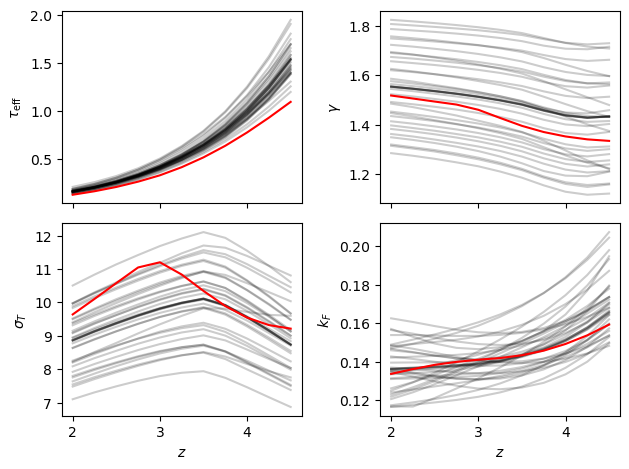

In [15]:
fig, ax = plt.subplots(2, 2, sharex=True)
ax = ax.reshape(-1)
for sim in igm_lace.keys():
    if(sim == "nyx_14"):
        continue
    if((sim == 'nyx_central') | (sim == 'mpg_reio')):
        col = 'r'
        alpha = 1
    else:
        col = 'k'
        alpha = 0.2
        
    par = ['tau_eff', 'gamma', 'sigT_kms', 'kF_kms']
    for jj in range(len(par)):
        _ = igm_lace[sim][par[jj]] != 0
        ax[jj].plot(igm_lace[sim]['z'][_], igm_lace[sim][par[jj]][_], col, alpha=alpha)

xlabs = [None, None, r'$z$', r'$z$']
ylabs = [r'$\tau_\mathrm{eff}$', r'$\gamma$', r'$\sigma_T$', r'$k_F$']
for ii in range(4):
    ax[ii].set_xlabel(xlabs[ii])
    ax[ii].set_ylabel(ylabs[ii])
plt.tight_layout()
# plt.savefig('/home/jchaves/Proyectos/projects/lya/data/nyx/IGM_histories.png')
# plt.savefig('/home/jchaves/Proyectos/projects/lya/data/nyx/IGM_histories.pdf')

### Compare Nyx and LaCE

In [ ]:
fig, ax = plt.subplots(2, 2, sharex=True)
ax = ax.reshape(-1)

for sim in igm_lace.keys():
    res = igm_lace
    col = 'k'
    alpha = 0.2
        
    par = ['tau_eff', 'gamma', 'sigT_kms', 'kF_kms']
    for jj in range(len(par)):
        _ = res[sim][par[jj]] != 0
        ax[jj].plot(res[sim]['z'][_], res[sim][par[jj]][_], col, alpha=alpha)

for sim in igm_nyx.keys():
    res = igm_nyx
    if(sim == "nyx_14"):
        continue
    col = 'r'
    alpha = 0.2
        
    par = ['tau_eff', 'gamma', 'sigT_kms', 'kF_kms']
    for jj in range(len(par)):
        _ = res[sim][par[jj]] != 0
        ax[jj].plot(res[sim]['z'][_], res[sim][par[jj]][_], col, alpha=alpha)

xlabs = [None, None, r'$z$', r'$z$']
ylabs = [r'$\tau_\mathrm{eff}$', r'$\gamma$', r'$\sigma_T$', r'$k_F$']
for ii in range(4):
    ax[ii].set_xlabel(xlabs[ii])
    ax[ii].set_ylabel(ylabs[ii])
plt.tight_layout()
# plt.savefig('/home/jchaves/Proyectos/projects/lya/data/nyx/IGM_histories_lace_nyx.png')
# plt.savefig('/home/jchaves/Proyectos/projects/lya/data/nyx/IGM_histories_lace_nyx.pdf')